<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Héctor Daniel Chávez Orozco y Miriam Eunice Rosas Medellín.

**Fecha:** 10 de febrero del 2021.

**Expediente** : 713442 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 2: Clase 4
**Link al repositorio en Github**: https://github.com/danielch4/TareaConjunto_MERosas_HDChavez

## Ejercicio 1

1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
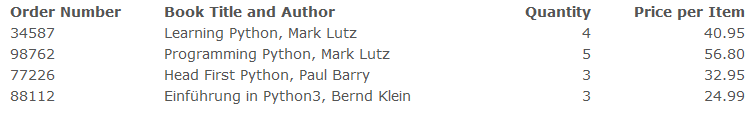

Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. La orden debe aumentarse en €10 si el valor de la orden es inferior a €100.00. 
Escribe un programa Python usando unicamente las funciones **lambda** y **map**.

`orders = [["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`

In [1]:
orders1 = [["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

### Solución de Héctor

#### Código

In [28]:
import numpy as np
f1=lambda x,y:x*y
f2=lambda x: x + 10 if x < 100 else x
mult=list(map(f2,[f1(orders1[i][2],orders1[i][3]) for i in np.arange(len(orders1))]))
mult

result=list(map(lambda x,y: (x[0],y),orders1,mult))
result

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

### Solución de Miriam

#### Código

In [2]:
formula_p_bruto = lambda p, c: p * c
formula_p_neto = lambda x: x + 10 if x < 100 else x
lista_a_tuplas_transpuesta = list(zip(*orders1))
p_final = list(map(formula_p_neto, map(formula_p_bruto, lista_a_tuplas_transpuesta[2], lista_a_tuplas_transpuesta[3])))
tuplas_completas = lista_a_tuplas_transpuesta[0], p_final
tuplas_transpuestas = list(zip(*tuplas_completas))
tuplas_transpuestas

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

#### Markdown

La lista de tuplas en la que el primer componente de cada tupla es el número de orden y el segundo es el precio total dada la condición proporcionada (sumarle 10 euros si el valor de la orden es inferior a 100), es la siguiente:
```
[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]
```

## Ejercicio 2

2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)]]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en €10 si el valor de la orden es inferior a €100.00.

In [3]:
orders2 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)]]

### Solución de Héctor

#### Código

In [30]:
from functools import reduce
total = list(map(lambda x: [x[0]] + list(map(lambda y: y[1]*y[2] 
                    if y[1]*y[2]>=100 else y[1]*y[2] +10 , x[1:])), orders2))

total = list(map(lambda x: [x[0]] + \
                 [reduce(lambda a,b: a + b, x[1:])], total))
total

[[1, 688.3299999999999],
 [2, 504.46000000000004],
 [3, 374.79999999999995],
 [4, 502.57]]

### Solución de Miriam

#### Código

In [4]:
from functools import reduce
suma = lambda x, y: x + y
condicion = lambda y: y[1] * y[2] + 10 if y[1] * y[2] < 100 else y[1] * y[2]
pedido = list(map(lambda x: (x[0], reduce(suma, list(map(condicion, x[1:])))), orders2))
pedido

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

#### Markdown

La lista de tuplas donde el primer componente de cada tupla es el número de pedido, y el segundo es el precio final, es la siguiente:
```
[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]
```

## Ejercicio 3

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

### Solución de Héctor

#### Código

In [42]:
import pandas as pd


result1 = pd.DataFrame(result)
result1 = result1.set_index(result1[0])
result1 = result1.drop(result1.columns[[0]], axis='columns')
result1 = result1.rename(columns={1: 'Resultado'})
result1 = result1.rename_axis('Número')
result1



,Resultado
Número,
34587,163.80
98762,284.00
77226,108.85
88112,84.97


In [43]:
total1= pd.DataFrame(total)
total1 = total1.set_index(total1[0])
total1 = total1.drop(total1.columns[[0]], axis='columns')
total1 = total1.rename(columns={1: 'Total'})
total1 = total1.rename_axis('Pedido')
total1

,Total
Pedido,
1,688.33
2,504.46
3,374.80
4,502.57


### Solución de Miriam

#### Código

In [5]:
# Ejercicio 1
import pandas as pd
df = pd.DataFrame(orders1, columns = ["Número", "Nombre", "Cantidad", "Precio"]).set_index("Número")
df["Total"] = df["Cantidad"] * df["Precio"]
df["Resultado"] = df["Total"].apply(formula_p_neto)
df.drop(columns = ["Nombre", "Cantidad", "Precio", "Total"], inplace = True)
df

,Resultado
Número,
34587,163.80
98762,284.00
77226,108.85
88112,84.97


In [6]:
# Ejercicio 2
import numpy as np
df = pd.DataFrame(orders2, columns = ["Pedido", "Orden 1", "Orden 2", "Orden 3"]).set_index("Pedido")
df.replace((None, None, None), np.zeros((3,), dtype =  "i, i, i"), inplace = True)
df["Total Orden 1"] = df["Orden 1"].apply(condicion)
df["Total Orden 2"] = df["Orden 2"].apply(condicion)
df["Total Orden 3"] = df["Orden 3"].apply(condicion)
df["Total Orden 3"] = df["Total Orden 3"].apply(lambda x: 0 if x == 10 else x)
df["Total"] = df["Total Orden 1"] + df["Total Orden 2"] + df["Total Orden 3"]
df.drop(columns = ["Orden 1", "Orden 2", "Orden 3", "Total Orden 1", "Total Orden 2", "Total Orden 3"], inplace = True)
df

,Total
Pedido,
1,688.33
2,504.46
3,374.80
4,502.57


#### Markdown

El dataframe resultante del ejercicio 1 es el siguiente:

|Número        |Resultado|
|-------------:|:-------:|
|**34587**     |163.80   |
|**98762**     |284.00   |
|**77226**     |108.85   |
|**88112**     |84.97    |

$$\text{Cuadro 1: Dataframe de la Solución 1}$$

El dataframe resultante del ejercicio 2 es el siguiente:

|Pedido    |Total |
|---------:|:----:|
|**1**     |688.33|
|**2**     |504.46|
|**3**     |374.80|
|**4**     |502.57|

$$\text{Cuadro 2: Dataframe de la Solución 2}$$

## Ejercicio 4

4. Usa filter para eliminar todas las palabras que tengan menos de 4 letras de la lista con las palabras
`list = "the notion of a lambda function goes all the way back to the origin of computer science"`

### Solución de Héctor

#### Código

In [55]:
frase ='the notion of a lambda function goes all the way back to the origin of computer science'

lista = list(filter((lambda x: len(x) >= 4), frase.split()))

frase, lista

('the notion of a lambda function goes all the way back to the origin of computer science',
 ['notion',
  'lambda',
  'function',
  'goes',
  'back',
  'origin',
  'computer',
  'science'])

### Solución de Miriam

#### Código

In [7]:
frase = "the notion of a lambda function goes all the way back to the origin of computer science"
lista = list(filter(lambda x: x if len(x) >= 4 else None, frase.split()))
lista

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

#### Markdown

La lista de palabras compuestas de 4 o más letras, provenientes de la frase proporcionada, es la siguiente:
```
['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']
```

## Ejercicio 5

5. Usa filter para determinar el porcentaje de temperaturas Fahrenheit dentro de la lista que están entre $32 ^{\circ} F$ y $80 ^{\circ} F$.

In [59]:
np.random.seed(55555)
temperatures = np.random.uniform(25, 110, 30)
temperatures

array([ 35.97387961,  99.13294268,  92.6178302 ,  99.69549478,
        63.21119535,  73.90387697,  95.50028838,  99.21476553,
        36.98251238, 101.45813729, 100.5917418 ,  89.38159435,
        89.52156589,  83.8084752 ,  28.37990868,  68.75395211,
        45.86132067,  36.58307493,  56.32208365,  33.96219302,
        45.29071318,  74.86289938,  66.51091383,  88.19316186,
        94.26635864,  46.83131624, 109.60744472, 109.68427993,
        44.55796499,  92.84146259])

### Solución de Héctor

#### Código

In [86]:
########### Solución 5
import numpy as np

listafiltrada= list(filter(lambda x:x>=32 and x<=80,temperatures))


print('La lista filtrada con las temperaturas que se encuentran entre  32∘𝐹  y  80∘𝐹  es:',listafiltrada,'El porcentaje de temperaturas de entre 32 y 80 es: %.2f ' %((len(list(listafiltrada))/len(temperatures))*100)+'%')

La lista filtrada con las temperaturas que se encuentran entre  32∘𝐹  y  80∘𝐹  es: [35.97387961379455, 63.211195349983264, 73.90387696517755, 36.982512376595906, 68.75395211338406, 45.86132066984196, 36.58307493022292, 56.322083650154724, 33.9621930206693, 45.29071317816652, 74.86289938282341, 66.51091382521807, 46.831316244170544, 44.55796498523391] El porcentaje de temperaturas de entre 32 y 80 es: 46.67 %


### Solución de Miriam

#### Código

In [9]:
lista_filtrada = list(filter(lambda x: x if 32<= x <= 80 else None, temperatures))
lista_filtrada

[35.97387961379455,
 63.211195349983264,
 73.90387696517755,
 36.982512376595906,
 68.75395211338406,
 45.86132066984196,
 36.58307493022292,
 56.322083650154724,
 33.9621930206693,
 45.29071317816652,
 74.86289938282341,
 66.51091382521807,
 46.831316244170544,
 44.55796498523391]

In [10]:
porcentaje = len(lista_filtrada) / len(temperatures) * 100
print("El porcentaje de temperaturas de entre 32 y 80 F es: " + str(porcentaje) + "%")

El porcentaje de temperaturas de entre 32 y 80 F es: 46.666666666666664%


#### Markdown

La lista filtrada con las temperaturas que se encuentran entre $32 ^{\circ} F$ y $80 ^{\circ} F$ es:
```
[35.97387961379455,
 63.211195349983264,
 73.90387696517755,
 36.982512376595906,
 68.75395211338406,
 45.86132066984196,
 36.58307493022292,
 56.322083650154724,
 33.9621930206693,
 45.29071317816652,
 74.86289938282341,
 66.51091382521807,
 46.831316244170544,
 44.55796498523391]
```
 
Mientras que el porcentaje de temperaturas de entre $32 ^{\circ} F$ y $80 ^{\circ} F$ es: $46.6\%$

## Ejercicio 6

6. Usa reduce para encontrar la esquina izquierda más pequeña (valores de x mínima y y mínima) en una lista de coordenadas de puntos.
> **Pista**: Explora el comando `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [23]:
np.random.seed(55555)
point_xy = np.random.randint(0, 100, [30, 2])
point_xy

array([[17, 97],
       [22, 33],
       [37, 46],
       [57, 28],
       [11, 25],
       [14,  2],
       [74, 16],
       [12, 37],
       [35, 21],
       [66, 65],
       [86, 58],
       [67, 81],
       [ 0, 48],
       [28, 66],
       [76, 22],
       [46, 47],
       [64,  7],
       [88, 94],
       [65, 13],
       [75, 89],
       [23, 17],
       [36, 63],
       [62, 36],
       [64, 17],
       [18, 19],
       [88, 41],
       [21, 49],
       [98, 36],
       [81, 73],
       [62, 90]])

### Solución de Héctor

#### Código

In [25]:
x = np.minimum.reduce(point_xy)
x

array([0, 2])

### Solución de Miriam

#### Código

In [12]:
esq_izq_peq = np.minimum.reduce(point_xy)
esq_izq_peq

array([0, 2])

#### Markdown

El valor más pequeño en la columna 0 de la matriz, es 0; mientras que el valor más pequeño en la columna 1 de la matriz, es 2. Por lo tanto, la esquina izquierda más pequeña es:
```
array([0, 2])
```

## Ejercicio 7

### Solución de Héctor

#### Código

Matplotlib is building the font cache; this may take a moment.


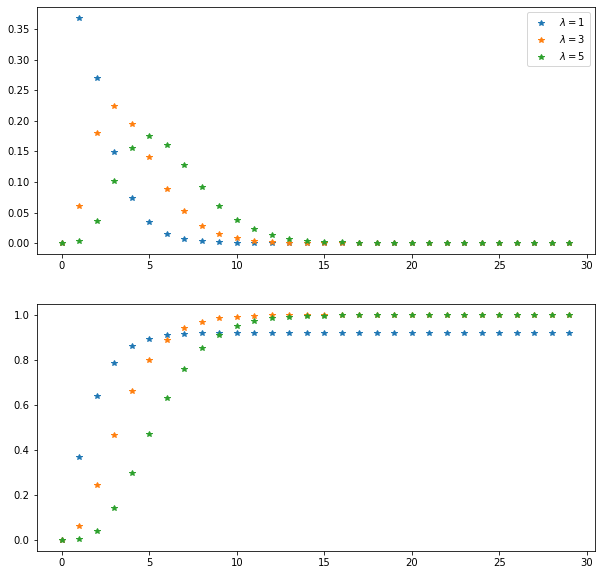

In [87]:
from itertools import cycle
import matplotlib.pyplot as plt
import scipy.special as sps
N = 30
l = [1, 3, 5]
k = np.arange(N)

p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)

P = np.array([p(lamb, k) for lamb in l])

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(k, P.T, '*')
ax[1].plot(k, np.cumsum(P.T, axis=0), '*')
ax[0].legend([f'$\lambda={l}$' for l in l])
plt.show()

### Solución de Miriam

#### Código

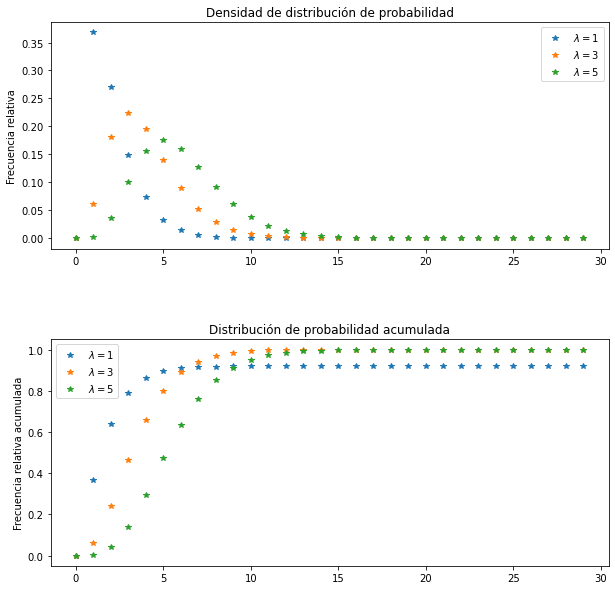

In [13]:
# Graficar para todo l una gráfica de p(k) usando subplots (como matrices), construir el legend en latex para cada l
from itertools import cycle
import matplotlib.pyplot as plt
import scipy.special as sps
N = 30
l = [1, 3, 5]
k = np.arange(N)
p = lambda k, l: (l**k * np.exp(-l)) / sps.factorial(k)

# Una sóla gráfica (frecuencia relativa y relativa acumulada) para todos los l sin vectorizar
lista = np.array([p(lam, k) for lam in l])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
ax1.plot(k, lista.T, "*")
ax2.plot(k, np.cumsum(lista.T, axis = 0), "*")
ax1.title.set_text("Densidad de distribución de probabilidad")
ax2.title.set_text("Distribución de probabilidad acumulada")
ax1.set_ylabel("Frecuencia relativa")
ax2.set_ylabel("Frecuencia relativa acumulada")
ax1.legend([f"$\lambda={lam}$" for lam in l])
ax2.legend([f"$\lambda={lam}$" for lam in l])
plt.subplots_adjust(hspace = .4)
plt.show()

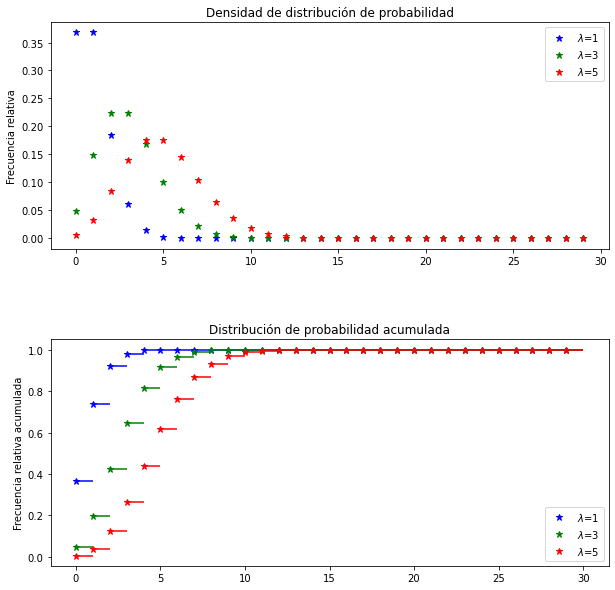

In [14]:
# Forma de resolver el problema de manera típica (para olvidar)
cycol = cycle("bgrcmk")

# Generar gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10));
ax1.title.set_text("Densidad de distribución de probabilidad")
ax2.title.set_text("Distribución de probabilidad acumulada")
ax1.set_ylabel("Frecuencia relativa")
ax2.set_ylabel("Frecuencia relativa acumulada")

# Cómo se haría de forma ineficiente
l = 1
for i in range(3):
    P = []
    c = next(cycol)
    for k in range(N):
        P.append(p(k, l))
    ax1.plot(P, "*", c = c, label = "$\lambda$=%s" % l, markersize = 7)        
    ax1.legend()
    ax2.plot(np.cumsum(P), "*", c = c, label = "$\lambda$=%s" % l, markersize = 7)
    ax2.legend()
    ax2.hlines(np.cumsum(P), range(len(P)), range(1, len(P) + 1), color = c)
    l += 2
plt.subplots_adjust(hspace = .4)
plt.show()

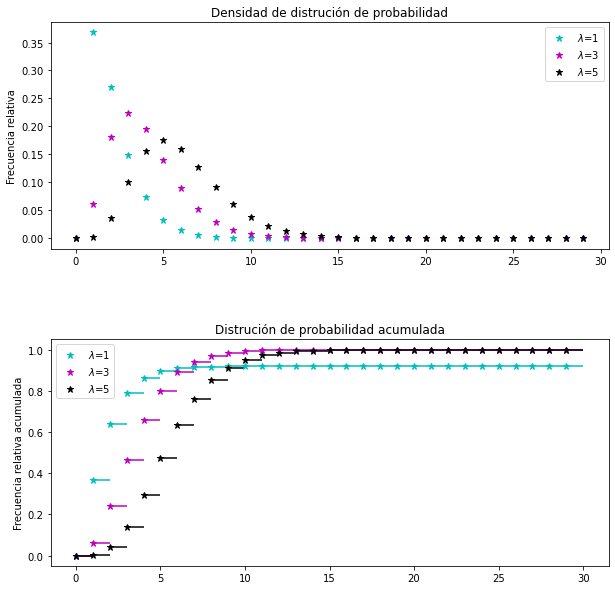

In [15]:
# Ahora crea una función tal que al llamarla cree una gráfica de p(k) para un lambda dado
def plotExponential(lamb, N, cycol):
    k = np.arange(N)
    L = lamb * np.ones(len(k))
    lista = p(lamb, k)
    c = next(cycol)
    ax1.plot(lista , "*", c = c, label = "$\lambda$=%d" % lamb, markersize = 7)
    ax1.legend()
    ax2.plot(np.cumsum(lista), "*", c = c, label = "$\lambda$=%s" % lamb, markersize = 7)
    ax2.legend()
    ax2.hlines(np.cumsum(lista), range(len(lista)), range(1, len(lista) + 1), color = c)

# Generar gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.title.set_text("Densidad de distrución de probabilidad")
ax2.title.set_text("Distrución de probabilidad acumulada")
ax1.set_ylabel("Frecuencia relativa")
ax2.set_ylabel("Frecuencia relativa acumulada")

# Forma vectorizada
l = [1, 3, 5]
[plotExponential(i, N, cycol) for i in l]
plt.subplots_adjust(hspace = .4)
plt.show()

#### Markdown

Las gráficas hechas de forma eficiente sin vectorizar, ineficiente, y eficiente vectorizada, son las siguientes respectivamente:
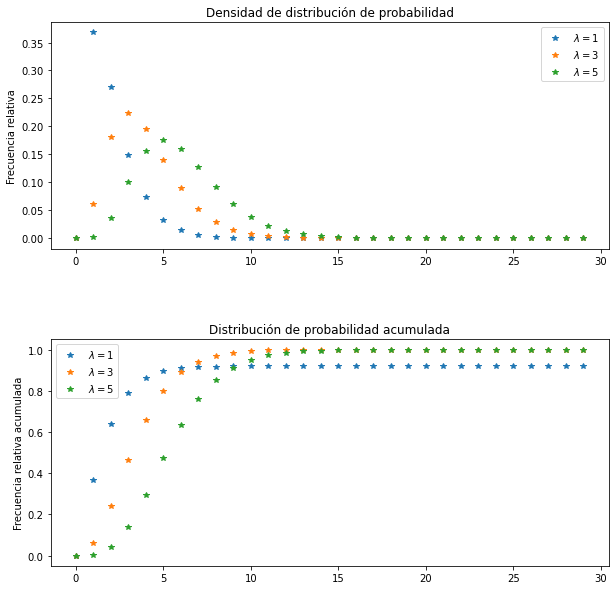
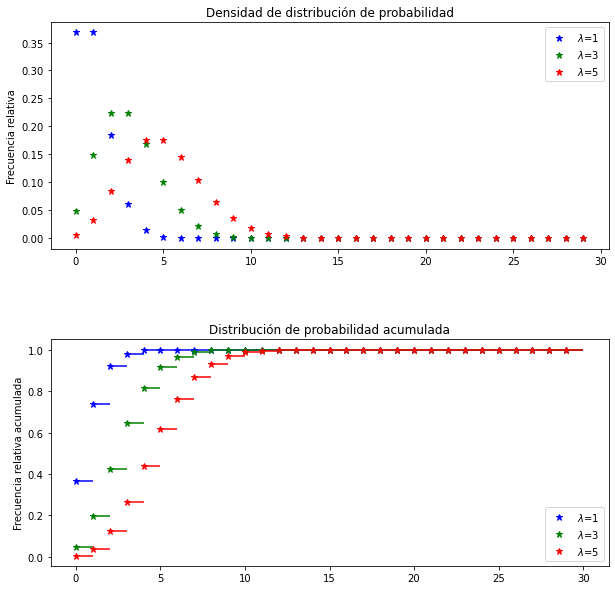
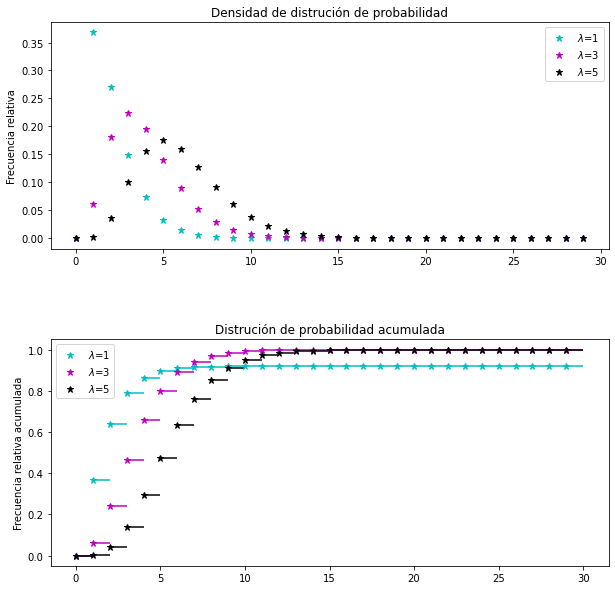